*to run this file you will need the pandas and ydata_profiling libraries

# Data Curation Final Project

The goal of this project is to develop an application that is able to integrate datasets related to landslides, avalanches, driveable roads and municipalities in the province of Bozen/Bolzano, allowing the user to query a SPARQL server for road segments that are in vulnerable areas and the municipalities that include the most kilometers of vulnerable areas.

##### **The Data**

For the project, a total of 4 datasets were chosen. These datasets were provided by the professors administering this class, and belong to different organizations.
<br><br>
The tables and respective organizations are:
- [UrbanPlan-HazardZonePlan-Landslides.csv](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/metadata/p_bz:TerritorialPlans:UrbanPlan-HazardZonePlan-Landslides)
- [UrbanPlan-HazardZonePlan-Avalanches.csv](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/metadata/p_bz:TerritorialPlans:UrbanPlan-HazardZonePlan-Avalanches)
- [Municipalities.csv](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/metadata/p_bz:AdministrativeUnits:Municipalities)

Which all belong to the [Bolzano Province GeoKatalog data](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/home)

and
- [sudagoost_tran_rds_ln_s4_osm_pp_drive.csv](https://edp-portal.eurac.edu/discovery/c389eb97-87c0-4948-8b6d-cfc44a4263b5)

which belongs to [Eurac](https://edp-portal.eurac.edu/discovery/c389eb97-87c0-4948-8b6d-cfc44a4263b5).

# Data Profiling Part

## Exploratory Data Analysis

The goal in this EDA phase is to identify what the data is about, what it contains and its structure. It will be analyzed table by table, and then inter-table relationships will be searched for.

Although the Data Wrangler extension for VSCode is being used for easily doing most of these tasks, for the sake of simplicity and to avoid excessive information, pandas will be used to enable easy reproducibility wherever it is needed.

<br>

### Municipalities
[_Municipalities.csv_](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/metadata/p_bz:AdministrativeUnits:Municipalities)


The dataset for municipalities contains a relation of all municipalities in South Tyrol, and is provided by the government of the province itself.

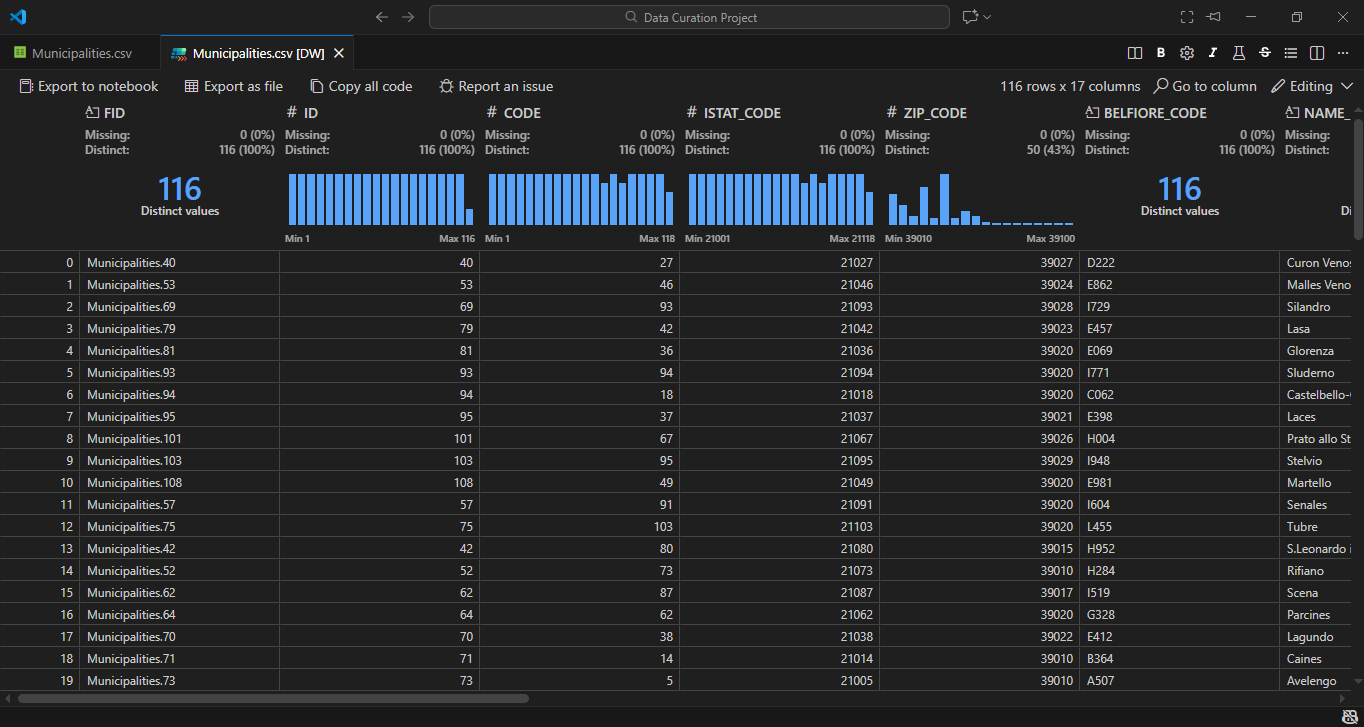

The municipalities.csv file consists of 17 columns with 116 rows in total, not counting the header.

The initial "eyeballing" lets us trivially identify that most columns have unique values (as many of them have 116 values, the same amount of rows). We can also see that each row corresponds to exactly one municipality and contains several columns of information about it (mostly codes for the same municipality in different contexts, such as its Belfiore Code and its German and Italian names).

In [1]:
import os
from pathlib import Path
filepath = Path(os.getcwd()) / 'Data'


import pandas as pd

municipalities = pd.read_csv(filepath / 'Municipalities.csv')
municipalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FID              116 non-null    object 
 1   ID               116 non-null    int64  
 2   CODE             116 non-null    int64  
 3   ISTAT_CODE       116 non-null    int64  
 4   ZIP_CODE         116 non-null    int64  
 5   BELFIORE_CODE    116 non-null    object 
 6   NAME_IT          116 non-null    object 
 7   NAME_DE          116 non-null    object 
 8   NAME_LD          116 non-null    object 
 9   DISTR_CODE       116 non-null    int64  
 10  DISTR_DE         116 non-null    object 
 11  DISTR_IT         116 non-null    object 
 12  AREA             116 non-null    float64
 13  HEALTH_REGION    116 non-null    int64  
 14  HEALTH_DISTRICT  116 non-null    int64  
 15  MAP_LABEL        116 non-null    object 
 16  SHAPE            116 non-null    object 
dtypes: float64(1), i

In [2]:
municipalities

,FID,ID,CODE,ISTAT_CODE,ZIP_CODE,BELFIORE_CODE,NAME_IT,NAME_DE,NAME_LD,DISTR_CODE,DISTR_DE,DISTR_IT,AREA,HEALTH_REGION,HEALTH_DISTRICT,MAP_LABEL,SHAPE
0,Municipalities.40,40,27,21027,39027,D222,Curon Venosta,Graun im Vinschgau,,1,Vinschgau,Val Venosta,2.100640e+08,2,21,Graun im Vinschgau\nCuron Venosta,"POLYGON ((612515.506 5190402.68, 612410.319 51..."
1,Municipalities.53,53,46,21046,39024,E862,Malles Venosta,Mals,,1,Vinschgau,Val Venosta,2.469756e+08,2,21,Mals\nMalles Venosta,"POLYGON ((629328.883 5183657.369, 629196.709 5..."
2,Municipalities.69,69,93,21093,39028,I729,Silandro,Schlanders,,1,Vinschgau,Val Venosta,1.151231e+08,2,22,Schlanders\nSilandro,"POLYGON ((631466.182 5171752.183, 631466.144 5..."
3,Municipalities.79,79,42,21042,39023,E457,Lasa,Laas,,1,Vinschgau,Val Venosta,1.100357e+08,2,22,Laas\nLasa,"POLYGON ((631466.182 5171752.183, 631465.436 5..."
4,Municipalities.81,81,36,21036,39020,E069,Glorenza,Glurns,,1,Vinschgau,Val Venosta,1.297799e+07,2,21,Glurns\nGlorenza,"POLYGON ((617875.636 5170809.166, 617875.802 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Municipalities.37,37,96,21096,39030,L106,Terento,Terenten,,8,Pustertal,Val Pusteria,4.253398e+07,4,42,Terenten\nTerento,"POLYGON ((711023.643 5195840.57, 711024.419 51..."
112,Municipalities.36,36,63,21063,39030,G443,Perca,Percha,,8,Pustertal,Val Pusteria,3.032460e+07,4,42,Percha\nPerca,"POLYGON ((733577.591 5197021.703, 733241.26 51..."
113,Municipalities.34,34,109,21109,39030,L601,Valle di Casies,Gsies,,8,Pustertal,Val Pusteria,1.090181e+08,4,43,Gsies\nValle di Casies,"POLYGON ((748332.91 5197781.932, 748285.499 51..."
114,Municipalities.31,31,71,21071,39030,H189,Rasun Anterselva,Rasen-Antholz,,8,Pustertal,Val Pusteria,1.210081e+08,4,42,Rasen-Antholz\nRasun Anterselva,"POLYGON ((739435.685 5200429.418, 739298.263 5..."


We can observe that while no column has null values, NAME_LD seems to be mostly empty cells.

In [3]:
municipalities.nunique()

FID                116
ID                 116
CODE               116
ISTAT_CODE         116
ZIP_CODE            50
BELFIORE_CODE      116
NAME_IT            116
NAME_DE            116
NAME_LD             10
DISTR_CODE           8
DISTR_DE             8
DISTR_IT             8
AREA               116
HEALTH_REGION        4
HEALTH_DISTRICT     20
MAP_LABEL          116
SHAPE              116
dtype: int64

We can see that there are a few columns that are not unique: NAME_LD, DISTR_CODE, DISTR_DE, DISTR_IT, HEALTH_REGION, HEALTH_DISTR and ZIP_CODE. Those are the only columns that might have interesting non-trivial dependencies.

Intuitively and from domain knowledge, we know that the municipality functionally determines the Ladin name when there is a name in Ladin for it
>MUNICIPALITY_CODE →c NAME_LD where c = (NAME_LD IS NOT NULL)

It is trivial to conclude that in this table every column is functionally determined by the municipality (and each of the columns that have 116 distinct values), although we cannot be really sure whether a municipality only has one zip code or not.

That leaves us with only one interesting possible dependency: is the district code functionally determined by the zip code?

In [70]:
# IMPLEMENTATIONS (making ANY library or tool for FD discovery work was taking way longer than coding this by hand would)

def check_for_fd(dataframe: pd.DataFrame, lsc: str, rsc: str, threshold: float = 1.0):
    if dataframe[lsc].isna().all():
        return False  # Empty columns cannot determine anything
    
    reduced_df = dataframe.groupby(lsc).filter(lambda x: len(x) > 1)
    
    if len(reduced_df) == 0: return True
    
    return (reduced_df.groupby(lsc)[rsc].nunique() ==  1).mean() >= threshold


def check_all_nontrivial_fd(dataframe: pd.DataFrame, combinations: bool = False, threshold: float = 1.0):
    """
    This will check all functional dependencies which satisfy the following conditions:
    1. The RHS column combination is not a subset of the LHS column combination
    2. There isn't any CC which depends on the LHS CC that also determines the RHS CC
    3. The LHS CC isn't a UCC
    """
    # Step 1: Separate unique and non-unique columns
    unique_columns = set()
    non_unique_columns = []
    
    for column in dataframe.columns:
        if dataframe[column].is_unique:
            unique_columns.add(column)
        else:
            non_unique_columns.append(column)
    
    # print(f"Unique columns: {unique_columns}")
    # print(f"Non-unique columns: {non_unique_columns}")
    
    # Step 2: Find all functional dependencies
    functional_dependencies = {}
    
    if not combinations:
        # Check all pairs of non-unique columns
        for i, lhs in enumerate(non_unique_columns):
            functional_dependencies[lhs] = set()
            
            for j, rhs in enumerate(non_unique_columns):
                if i != j:  # Don't check column against itself
                    if check_for_fd(dataframe, lhs, rhs, threshold):
                        # print(f"{lhs} → {rhs}")
                        functional_dependencies[lhs].add(rhs)
    
    # Step 3: Find equivalence classes using Union-Find
    parent = {}
    
    def find(x):
        if x not in parent:
            parent[x] = x
        if parent[x] != x:
            parent[x] = find(parent[x])
        return parent[x]
    
    def union(x, y):
        px, py = find(x), find(y)
        if px != py:
            parent[px] = py
    
    # Union mutually dependent columns
    for lhs, rhs_set in functional_dependencies.items():
        for rhs in rhs_set:
            if rhs in functional_dependencies and lhs in functional_dependencies[rhs]:
                union(lhs, rhs)
    
    # Group by equivalence class
    classes = {}
    for col in functional_dependencies.keys():
        root = find(col)
        if root not in classes:
            classes[root] = set()
        classes[root].add(col)
    
    equivalence_classes = [cls for cls in classes.values() if len(cls) > 1]
    
    # Step 4: Find minimal dependencies (remove transitive ones)
    minimal_dependencies = {}
    
    for lhs, rhs_set in functional_dependencies.items():
        if find(lhs) != lhs: continue # Skip columns that aren't roots
        lhs_group = classes[lhs]
        
        if len(lhs_group) < 2:
            lhs_group = lhs
            
        minimal_dependencies[str(lhs_group)] = set()
        
        for rhs in rhs_set:
            # Check if this dependency is minimal (not transitive)
            is_minimal = True
            
            # Check if rhs can be reached through intermediate steps
            for intermediate in rhs_set:
                if intermediate == rhs or find(intermediate) == find(lhs): continue
                if intermediate in functional_dependencies:
                    if rhs in functional_dependencies[intermediate]:
                        # Found transitive path: lhs → intermediate → rhs
                        is_minimal = False
                        break
            
            if is_minimal:
                if find(rhs) == rhs:
                    if len(classes[rhs]) > 1:
                        rhs = str(classes[rhs])
                    minimal_dependencies[str(lhs_group)].add(rhs)
    
    # Step 5: Return results
    return {
        'all_fds': functional_dependencies,
        'minimal_fds': minimal_dependencies,
        'equivalence_classes': equivalence_classes,
        'unique_columns': unique_columns
    }


def print_nontrivial_fd(functional_dependencies):
    print("\n=== RESULTS ===")
    print(f"\nEquivalence Classes: {functional_dependencies['equivalence_classes']}")
    print(f"\nMinimal FDs:")
    for lhs, rhs_set in functional_dependencies['minimal_fds'].items():
        for rhs in rhs_set:
            print(f"  {lhs} → {rhs}")
    print(f"\nUnique columns:")
    for column in functional_dependencies['unique_columns']:
        print(f"  {column}")

result = check_all_nontrivial_fd(municipalities)
print_nontrivial_fd(result)



=== RESULTS ===

Equivalence Classes: [{'DISTR_IT', 'DISTR_CODE', 'DISTR_DE'}]

Minimal FDs:
  HEALTH_DISTRICT → HEALTH_REGION

Unique columns:
  ID
  NAME_DE
  BELFIORE_CODE
  FID
  SHAPE
  MAP_LABEL
  NAME_IT
  ISTAT_CODE
  CODE
  AREA


Surprisingly, ZIP_CODE doesn't determine any of the other geographic region columns.

<br>

### Hazards - Avalanches
[_UrbanPlan-HazardZonePlan-Avalanches.csv_](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/metadata/p_bz:TerritorialPlans:UrbanPlan-HazardZonePlan-Avalanches)

We can repeat the same process with the Avalanches dataset.

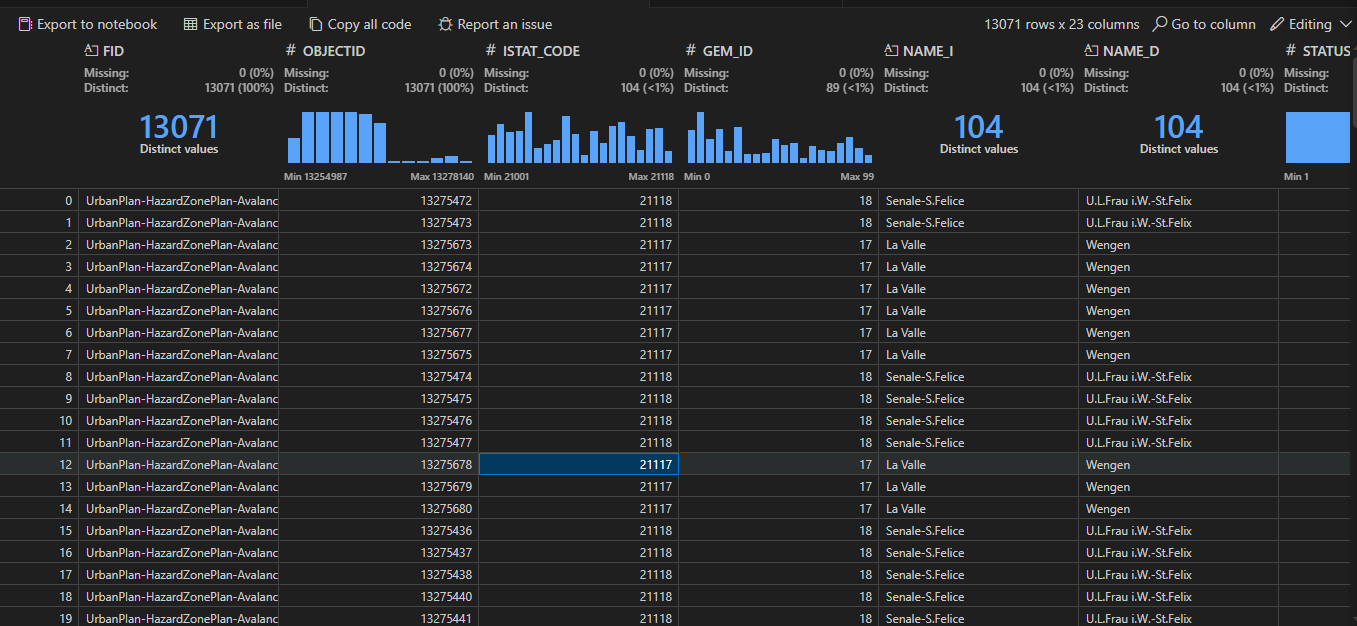

We can see that this table is considerably larger, having a larger number of columns and much larger of rows. We have some columns that suggest a possible join with the previous table (NAME_I, NAME_D, ISTAT_CODE) and others that contain completely new information. Some columns seem to be equivalent in diferent languages.

In [65]:
avalanches = pd.read_csv(filepath / 'UrbanPlan-HazardZonePlan-Avalanches.csv')
avalanches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13071 entries, 0 to 13070
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FID                13071 non-null  object 
 1   OBJECTID           13071 non-null  int64  
 2   ISTAT_CODE         13071 non-null  int64  
 3   GEM_ID             13071 non-null  int64  
 4   NAME_I             13071 non-null  object 
 5   NAME_D             13071 non-null  object 
 6   STATUS_GZP         13071 non-null  int64  
 7   DESC_I             13071 non-null  object 
 8   DESC_D             13071 non-null  object 
 9   CODE               13071 non-null  int64  
 10  PERICOLO           13071 non-null  object 
 11  GEFAHR             13071 non-null  object 
 12  ID_PROCESS         13071 non-null  object 
 13  PROCESSO           13071 non-null  object 
 14  PROZESS            13071 non-null  object 
 15  ID_GP              13071 non-null  object 
 16  ID_GS              130

Weirdly enough, there's a column that is fully empty (ID_PHEN).

Some of this information seems to be irrelevant for our application (we don't really need label coordinates or redundant danger classifications in different languages)

In [66]:
avalanches.nunique()

FID                  13071
OBJECTID             13071
ISTAT_CODE             104
GEM_ID                  89
NAME_I                 104
NAME_D                 104
STATUS_GZP               1
DESC_I                   1
DESC_D                   1
CODE                     4
PERICOLO                 4
GEFAHR                   4
ID_PROCESS               5
PROCESSO                 5
PROZESS                  5
ID_GP                   11
ID_GS                    3
ID_PHEN                  0
GRADODISTUDIO            2
BEARBEITUNGSTIEFE        2
X_LABEL              13039
Y_LABEL              13035
SHAPE                13050
dtype: int64

In combination with the count unique function that we saw before, we know we'll be able to discard a few of these columns;

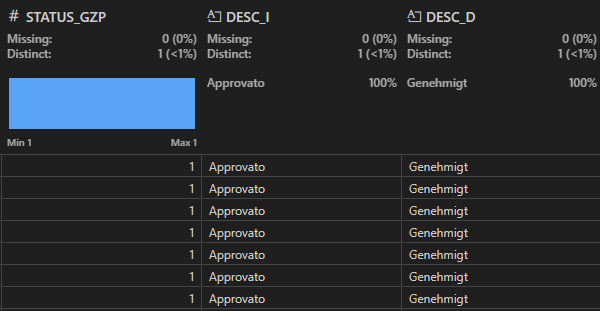

These three columns are completely redundant, as only approved studies have been included in the table and we won't model the approval process.

ID_PHEN is completely empty and can be discarded.

We can now check for functional dependencies.

In [71]:
result = check_all_nontrivial_fd(avalanches)
print_nontrivial_fd(result)


=== RESULTS ===

Equivalence Classes: [{'ISTAT_CODE', 'NAME_I', 'NAME_D'}, {'STATUS_GZP', 'DESC_D', 'DESC_I'}, {'PERICOLO', 'GEFAHR', 'CODE'}, {'PROZESS', 'PROCESSO', 'ID_PROCESS'}, {'GRADODISTUDIO', 'ID_GS', 'BEARBEITUNGSTIEFE'}]

Minimal FDs:
  {'ISTAT_CODE', 'NAME_I', 'NAME_D'} → GEM_ID
  SHAPE → ID_GP
  SHAPE → Y_LABEL
  SHAPE → X_LABEL

Unique columns:
  OBJECTID
  FID


We can identify several classes that could be included in our ontology. Some of these FDs are a bit weird. Shape should probably be an unique column, and GEM_ID should probably be in an equivalence class with ISTAT_CODE.

We can write some code to evaluate these differences from our expectancy.

In [90]:
avalanches[["NAME_I","GEM_ID"]].drop_duplicates().sort_values("GEM_ID")[lambda df: df.duplicated(subset="GEM_ID", keep=False)]

,NAME_I,GEM_ID
6377,Trodena nel parco naturale,2
9284,Andriano,2
7703,Anterivo,3
9241,Tubre,3
2930,Appiano s.s.d.v.,4
459,Ultimo,4
9539,Avelengo,5
4316,Vadena,5
7631,Barbiano,7
271,Val di Vizze,7


If we investigate the relationship between GEM_ID and NAME_I, we can see that these two municipalities share a GEM_ID (which can be reasonably supposed to mean Gemeinde identification) but don't even share a border.

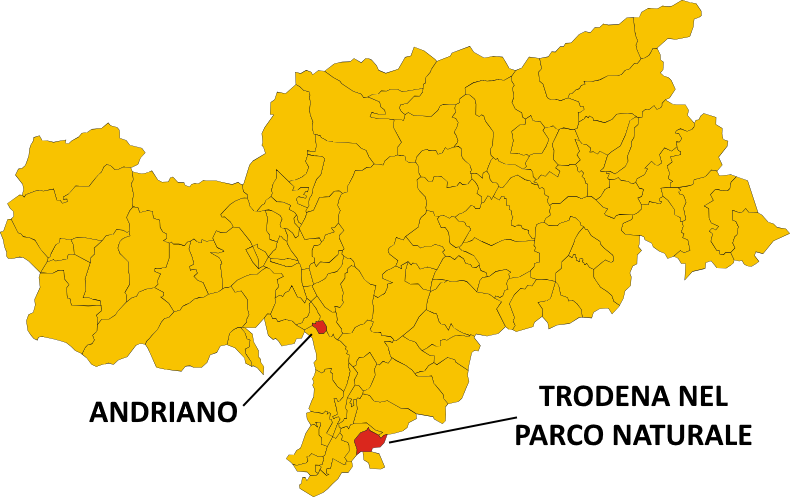

Since the Wikipedia page doesn't include such weird city limits, it's reasonable to suppose that the GEM_ID is simply wrong and should be ignored as it is redundant and less accurate than other columns.

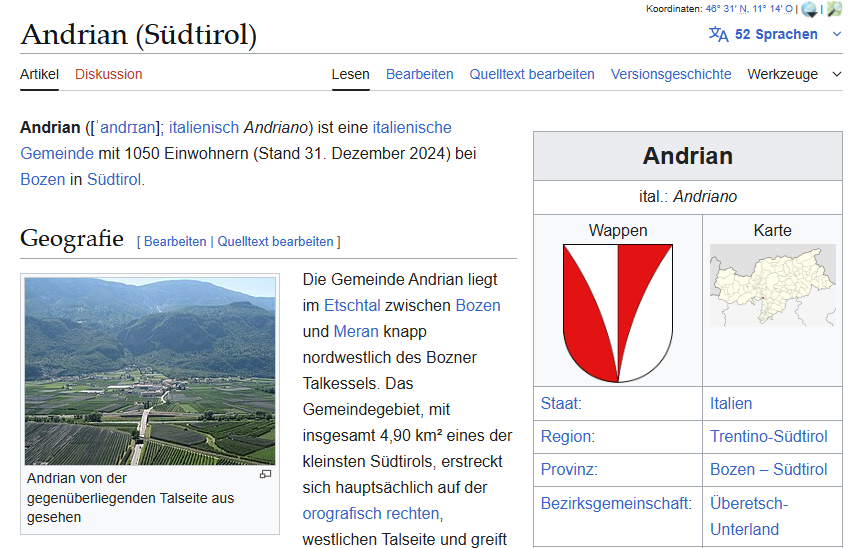